In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# function file import
from functions import all_functions

# model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


### Step 1: Creating a function to get desired information using youtube_api

In [2]:
# creating a list of youtubers want to work

api_key = os.environ.get('YOUTUBE_API')

channel_ids = ['UChnN9MPURwKV2PbEoT2vhTQ',  #randomfrankp
              'UC3ByF8DcZ3yxUs7VP1NOuyA',   #REWA Technology
              'UCZ7qe4QUGie6jtJPPEHQx7Q',   #MINDS EYE DESIGN
              'UCxLtlkUb0Lanig4YyDcP2fQ',   #Zebra Technologies
              'UCvHdYD2Qchr9RFJTgIPIuDw'    #Generation Tech
              ] 

youtube = build('youtube', 'v3', developerKey=api_key)

In [3]:
# calling get_channel_stats function from functions.py

channel_stats = pd.DataFrame(all_functions.get_chanel_stats(youtube, channel_ids))
channel_stats

,channel_name,Geographical_area,Channel_views,Channel_subscribers,Channel_videos,playlist_id
0,Zebra Technologies,US,19388058,25300,3242,UUxLtlkUb0Lanig4YyDcP2fQ
1,MINDS EYE DESIGN,US,272047832,999000,454,UUZ7qe4QUGie6jtJPPEHQx7Q
2,REWA Technology,HK,231778661,698000,946,UU3ByF8DcZ3yxUs7VP1NOuyA
3,Generation Tech,US,345430647,783000,1450,UUvHdYD2Qchr9RFJTgIPIuDw
4,randomfrankp,US,465566795,2160000,1168,UUhnN9MPURwKV2PbEoT2vhTQ


In [5]:
# creating a csvfile
file_path = 'D:\Bootcamp\Projects\LHL_Mid-Term Project\DataFrames\channel_stats_akash.csv'
channel_stats.to_csv(file_path, index = False)

In [6]:
channel_stats.dtypes # cheking for datatypes

channel_name           object
Geographical_area      object
Channel_views          object
Channel_subscribers    object
Channel_videos         object
playlist_id            object
dtype: object

In [7]:
channel_stats['Channel_views'] = pd.to_numeric(channel_stats['Channel_views'])
channel_stats['Channel_subscribers'] = pd.to_numeric(channel_stats['Channel_subscribers'])
channel_stats['Channel_videos'] = pd.to_numeric(channel_stats['Channel_videos'])
channel_stats.dtypes # converting datatypes to more appropriate types

channel_name           object
Geographical_area      object
Channel_views           int64
Channel_subscribers     int64
Channel_videos          int64
playlist_id            object
dtype: object

### Step 2: Visualize the dataframe for trend, pattern

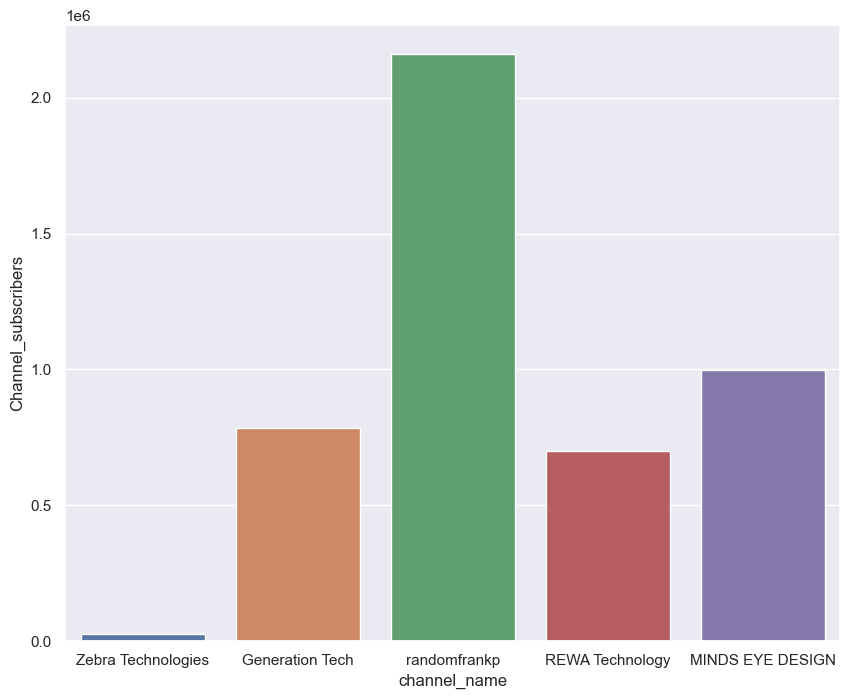

In [8]:
# bar chart shows channel_subscribers
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channel_name', y='Channel_subscribers', data=channel_stats)

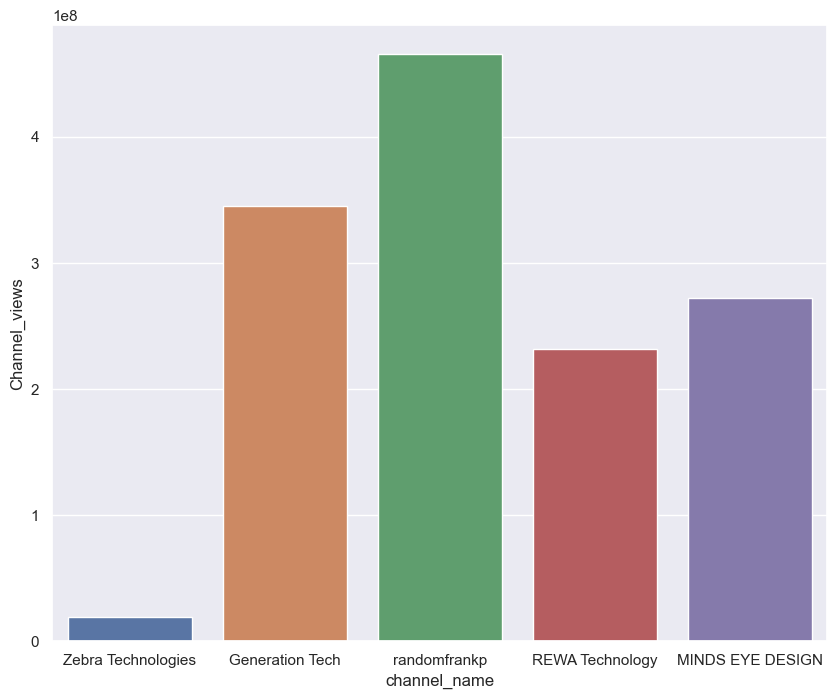

In [9]:
# bar chart to compare views of each youtubers
ax = sns.barplot(x='channel_name', y='Channel_views', data=channel_stats)

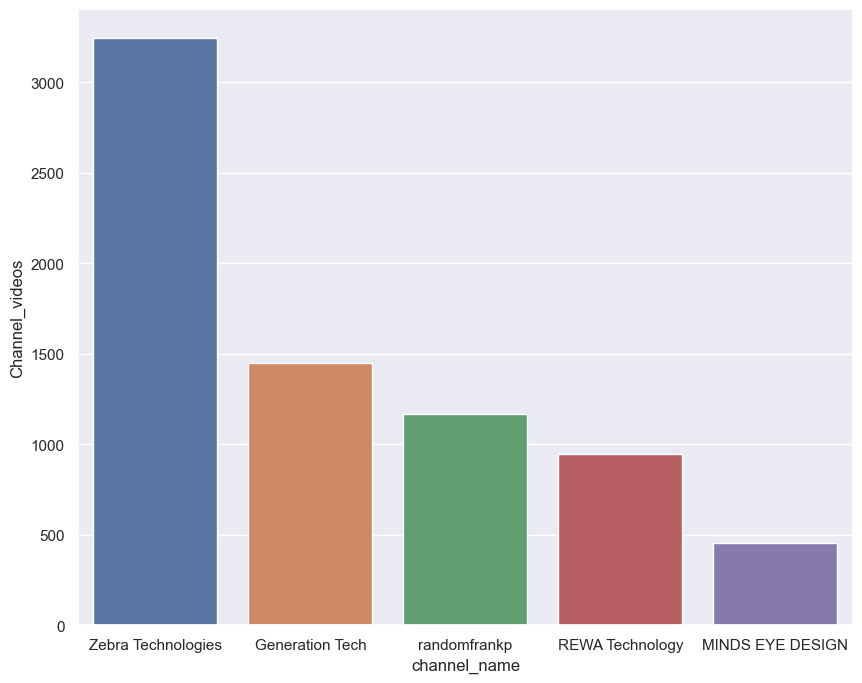

In [10]:
# bar chart to compare total uploaded videos on the channel
ax = sns.barplot(x='channel_name', y='Channel_videos', data=channel_stats)

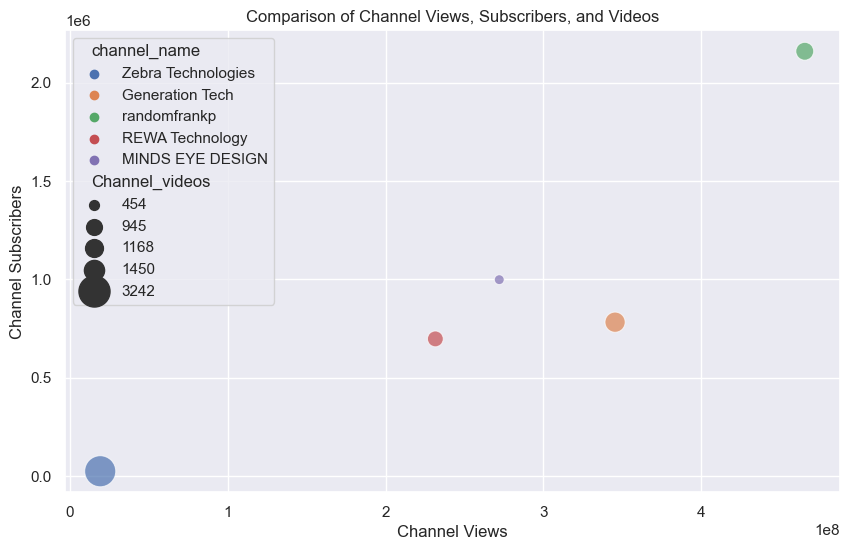

In [30]:
# creating a bubble chart to visualize all factors togather
# set the style for the plot
sns.set(style='darkgrid')

# set the figure size
plt.figure(figsize=(10, 6))

# create the bubble chart
sns.scatterplot(data=channel_stats, x='Channel_views', y='Channel_subscribers', size='Channel_videos', sizes=(50, 500),
                hue='channel_name', alpha=0.7)

# set the labels and title of the plot
plt.xlabel('Channel Views')
plt.ylabel('Channel Subscribers')
plt.title('Comparison of Channel Views, Subscribers, and Videos')

# show the plot
plt.show()

#### Conclusion

1. 'randomfrankp' has higest views and subscribers but he has not have higest views, infect his channel has less then half amount of videos then 'Zebra Technologies' has.

2. While 'Zebra Technologies' has lowest amount of views and almost none subscribers comare to 'randomfrankp'

This dataset contains lesser known youtubers, George is working on a dataset with wellknown youtubers in technology gener.



### Step 3: Analyzing 'randomfrankp'

In [11]:
# getting playlist_id of 'randomfrankp' 
playlist_id = channel_stats.loc[channel_stats['channel_name']=='randomfrankp', 'playlist_id'].iloc[0]
playlist_id

'UUhnN9MPURwKV2PbEoT2vhTQ'

In [12]:
# calling out function get_video_ides from functions.py
# getting information of 'randomfrankp'

all_functions.get_video_ids(youtube, playlist_id)

{'kind': 'youtube#playlistItemListResponse',
 'etag': 's_zqUKQIsEKKw-2-31RUA9-zH8o',
 'nextPageToken': 'EAAaBlBUOkNESQ',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'HCSRRZBg8jbJkjBZiT2NTIItisE',
   'id': 'VVVobk45TVBVUndLVjJQYkVvVDJ2aFRRLmsxYzBlVWdQQkxn',
   'contentDetails': {'videoId': 'k1c0eUgPBLg',
    'videoPublishedAt': '2023-07-12T14:00:35Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'gkEdp6aUScM6OJXnfvsmMk-klYo',
   'id': 'VVVobk45TVBVUndLVjJQYkVvVDJ2aFRRLkZ1YVFwQXpxcFhJ',
   'contentDetails': {'videoId': 'FuaQpAzqpXI',
    'videoPublishedAt': '2023-07-11T14:00:17Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'ikahoYST60CZ1PNlxx0x1RAQ0TI',
   'id': 'VVVobk45TVBVUndLVjJQYkVvVDJ2aFRRLk5xX085OUlKVXdV',
   'contentDetails': {'videoId': 'Nq_O99IJUwU',
    'videoPublishedAt': '2023-07-09T13:00:27Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'J-OTQ5TtqA0vvVkiJH_pEW0DBWc',
   'id': 'VVVobk45TVBVUndLVjJQYkVvVDJ2aFRRLkhlcjNXMVhwWE5J',
   'contentDetails': {'v

In [13]:
video_ids = all_functions.get_video_ids_all(youtube, playlist_id)
video_ids #just the video ids of all the videos

['k1c0eUgPBLg',
 'FuaQpAzqpXI',
 'Nq_O99IJUwU',
 'Her3W1XpXNI',
 'nZx9kytlEyM',
 'NIJhge5EYjE',
 'F7y9COM-VOc',
 'jumeu8V-mnk',
 'MRknq7qYQdo',
 'vgyjNx33GLA',
 'ornfLbw1WR0',
 'V_qcYk8ZXdQ',
 'Znbqsu7y238',
 'kXbQCOh0bG4',
 '_u8gV643214',
 'iqMs6CmIL6A',
 'G2GzYtRH0o4',
 'Tapoh0imNIw',
 'aYFwSlxe8ZI',
 'IRugNlf-rrQ',
 'AzpBaaOCWUI',
 'oKTszCJnoig',
 'Zp4B-DxWT0E',
 'qQWIKQfCMog',
 'GVC5gtFP6VQ',
 'glr6iNdkbFw',
 'USyaymw0VV0',
 'c7xe-gDOmBU',
 'QW2S_fyJxDM',
 '36ECJDml1SA',
 '94WoHfgMUXo',
 'zkJITdU3Ce8',
 'Mup46o6Apjg',
 'KXkKC4_wKJA',
 'rtLZ4dnKAhY',
 'Tjjh2oi9H0o',
 '0uAX-9rbOwM',
 'oTB-iNt4cyE',
 'RiiA1ARVTnU',
 'lbXzqfHwzvE',
 'C03CiTV6bLE',
 '8Ru-XoBT2rA',
 'j76jyjO0GgQ',
 'HrMJUzJjrKo',
 '4a7wifMvZcg',
 'YQjwh3h3QUc',
 'CWoe36vSh24',
 'L4rxhbzXOck',
 'QPywBmNp0IU',
 'DM7wiJp6LdQ',
 'XYbVUO7f4OM',
 'GlE3mXry3yY',
 '7Hj0SVJDRfI',
 'l56aBE24j6A',
 'TJmk8Fnfccs',
 '0ups1ZBehnc',
 '9pK83QfQsCs',
 'QomRFh6T7Lg',
 '3CPBQaU8iUo',
 'STmo7xw4vsE',
 'dUZxW2VzyIk',
 'cj4lxmHQV0o',
 'MROR0U

### Step 4 : Getting stats of the videos

In [14]:
len(video_ids) # length of the list, matches total video count.

1168

In [15]:
# getting video details

all_functions.get_video_details(youtube, video_ids)

{'kind': 'youtube#videoListResponse',
 'etag': 'Bi-zPiSfTcPvYrkR91NX2UEAeys',
 'items': [{'kind': 'youtube#video',
   'etag': 'w5MAJEl_CtE8fvgrYMlLuSijX-U',
   'id': 'k1c0eUgPBLg',
   'snippet': {'publishedAt': '2023-07-12T14:00:35Z',
    'channelId': 'UChnN9MPURwKV2PbEoT2vhTQ',
    'title': 'DAY 2 Best Amazon Prime Day 2023 Tech Deals 🔥 (Updating Hourly!)',
    'description': 'Happy Amazon Prime Day (Day 2)! Here are some of the top Tech Deals for Prime day 2023.\n👇🏼 ALL DEAL LINKS ARE FEATURED IN THE DESCRIPTION BELOW 👇🏼\nFIRST - If you don’t have a Prime Membership, sign up for a FREE trial here: http://amazon.com/tryprimefree?tag=randomfrankp-20\n🔥 Keychron V1 Keyboard: https://amzn.to/3JTraoY\n🔥 iQunix OG80 Dark Side: https://amzn.to/3DaQdQQ\n🔥 Razer Huntsman Mini 60%: https://amzn.to/3pGRRqf\n🔥 Womier SK75 75% Keyboard: https://amzn.to/3NRr3eG\n🔥 ATH-M50xBT2 Headphones: https://amzn.to/44DKPRH\n🔥 SENNHEISER HD 660S2 Headphones: https://amzn.to/3D7liVq\n🔥 Razer Leviathan V2 X Soun

In [16]:
video_details = all_functions.get_video_details_all(youtube, video_ids)
video_details # this list contains dictionaries which has all the desired video stats

[{'Title': 'DAY 2 Best Amazon Prime Day 2023 Tech Deals 🔥 (Updating Hourly!)',
  'Published_date': '2023-07-12T14:00:35Z',
  'Views': '96542',
  'Likes': '2441',
  'Comments': '105'},
 {'Title': 'Top Amazon Prime Day 2023 TECH Deals 🔥',
  'Published_date': '2023-07-11T14:00:17Z',
  'Views': '194046',
  'Likes': '4982',
  'Comments': '268'},
 {'Title': 'Room Tour Project 274 - Super Clean & Minimal Desk Setups!',
  'Published_date': '2023-07-09T13:00:27Z',
  'Views': '49222',
  'Likes': '2453',
  'Comments': '87'},
 {'Title': 'Awesome Gaming Keyboards Under $50!',
  'Published_date': '2023-07-08T13:00:11Z',
  'Views': '75921',
  'Likes': '2778',
  'Comments': '213'},
 {'Title': 'My $10,000 Random Tech Unboxing Haul 🤑',
  'Published_date': '2023-07-07T15:00:46Z',
  'Views': '82361',
  'Likes': '4189',
  'Comments': '223'},
 {'Title': 'My Favorite Tech Gadgets You Can Buy RIGHT NOW!',
  'Published_date': '2023-07-03T15:00:16Z',
  'Views': '341747',
  'Likes': '11154',
  'Comments': '383'}

In [17]:
video_data = pd.DataFrame(video_details)
video_data #creating a dataframe with the list value

,Title,Published_date,Views,Likes,Comments
0,DAY 2 Best Amazon Prime Day 2023 Tech Deals 🔥 ...,2023-07-12T14:00:35Z,96542,2441,105
1,Top Amazon Prime Day 2023 TECH Deals 🔥,2023-07-11T14:00:17Z,194046,4982,268
2,Room Tour Project 274 - Super Clean & Minimal ...,2023-07-09T13:00:27Z,49222,2453,87
3,Awesome Gaming Keyboards Under $50!,2023-07-08T13:00:11Z,75921,2778,213
4,"My $10,000 Random Tech Unboxing Haul 🤑",2023-07-07T15:00:46Z,82361,4189,223
...,...,...,...,...,...
1163,Dead of Night,2011-01-16T04:59:08Z,769,30,11
1164,iPhone 4 Official Unboxing (HD),2010-06-24T07:05:45Z,7258,206,66
1165,Slaya Productions Action Trailer,2009-07-09T17:46:05Z,3584,102,20
1166,Police Guys (2007),2008-10-05T21:25:18Z,2572,77,24


In [18]:
video_data.dtypes # checking datatype

Title             object
Published_date    object
Views             object
Likes             object
Comments          object
dtype: object

In [19]:
# changing datatypes to more appropriate type for model building

video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data

,Title,Published_date,Views,Likes,Comments
0,DAY 2 Best Amazon Prime Day 2023 Tech Deals 🔥 ...,2023-07-12,96542,2441,105
1,Top Amazon Prime Day 2023 TECH Deals 🔥,2023-07-11,194046,4982,268
2,Room Tour Project 274 - Super Clean & Minimal ...,2023-07-09,49222,2453,87
3,Awesome Gaming Keyboards Under $50!,2023-07-08,75921,2778,213
4,"My $10,000 Random Tech Unboxing Haul 🤑",2023-07-07,82361,4189,223
...,...,...,...,...,...
1163,Dead of Night,2011-01-16,769,30,11
1164,iPhone 4 Official Unboxing (HD),2010-06-24,7258,206,66
1165,Slaya Productions Action Trailer,2009-07-09,3584,102,20
1166,Police Guys (2007),2008-10-05,2572,77,24


In [33]:
video_data['Youtuber'] = "randomfrankp"

# Rearrange the columns
video_data = video_data[['Youtuber', 'Title', 'Published_date', 'Views', 'Likes', 'Comments']]

video_data.head(10)

,Youtuber,Title,Published_date,Views,Likes,Comments
0,randomfrankp,DAY 2 Best Amazon Prime Day 2023 Tech Deals 🔥 ...,2023-07-12,96542,2441,105
1,randomfrankp,Top Amazon Prime Day 2023 TECH Deals 🔥,2023-07-11,194046,4982,268
2,randomfrankp,Room Tour Project 274 - Super Clean & Minimal ...,2023-07-09,49222,2453,87
3,randomfrankp,Awesome Gaming Keyboards Under $50!,2023-07-08,75921,2778,213
4,randomfrankp,"My $10,000 Random Tech Unboxing Haul 🤑",2023-07-07,82361,4189,223
5,randomfrankp,My Favorite Tech Gadgets You Can Buy RIGHT NOW!,2023-07-03,341747,11154,383
6,randomfrankp,Cool Tech Under $100!,2023-07-02,310980,9489,581
7,randomfrankp,Cool Tech Under $50 - July!,2023-07-01,517736,16562,2370
8,randomfrankp,10 Tips To Improve Your Gaming / Desk Setup!,2023-06-30,184488,7388,327
9,randomfrankp,Razer failed us with the new Cobra Pro.,2023-06-29,85283,3286,475


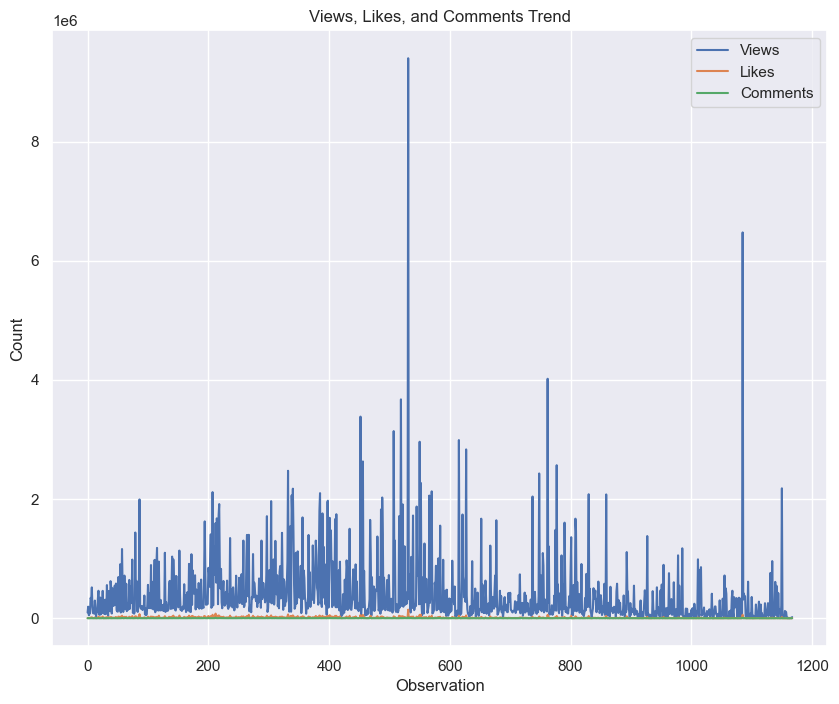

In [32]:
# Trend line graph for Views, Likes and Comments

views = video_data['Views']
likes = video_data['Likes']
comments = video_data['Comments']

plt.plot(views, label='Views')
plt.plot(likes, label='Likes')
plt.plot(comments, label='Comments')

# Set plot title and labels
plt.title('Views, Likes, and Comments Trend')
plt.xlabel('Observation')
plt.ylabel('Count')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [22]:
video_data.dtypes #dataframe is ready for model building

Youtuber          object
Title             object
Published_date    object
Views              int64
Likes              int64
Comments           int64
dtype: object

In [26]:
# creating a csvfile
file_path = "D:\Bootcamp\Projects\Mid-Term\Final_files\DataFrames/video_data_akash.csv"
video_data.to_csv(file_path, index = False)

### Step 5 : Model Building

In [ ]:
video_data.dtypes

Title             object
Published_date    object
Views              int64
Likes              int64
Comments           int64
dtype: object

In [ ]:
# convert the 'Published_date' column to datetime type
video_data['Published_date'] = pd.to_datetime(video_data['Published_date'])

# extract the year and month from the 'Published_date' column
video_data['Year'] = video_data['Published_date'].dt.year
video_data['Month'] = video_data['Published_date'].dt.month

# display the updated DataFrame
video_data.head(10)

,Title,Published_date,Views,Likes,Comments,Year,Month
0,LIVE 🔴 Amazon Prime Day 2023 TECH Deals 🔥,2023-07-13,28827,514,9,2023,7
1,DAY 2 Best Amazon Prime Day 2023 Tech Deals 🔥 ...,2023-07-12,96198,2439,104,2023,7
2,Top Amazon Prime Day 2023 TECH Deals 🔥,2023-07-11,193866,4981,268,2023,7
3,Room Tour Project 274 - Super Clean & Minimal ...,2023-07-09,49139,2453,87,2023,7
4,Awesome Gaming Keyboards Under $50!,2023-07-08,75863,2775,213,2023,7
5,"My $10,000 Random Tech Unboxing Haul 🤑",2023-07-07,82278,4185,223,2023,7
6,My Favorite Tech Gadgets You Can Buy RIGHT NOW!,2023-07-03,341249,11139,383,2023,7
7,Cool Tech Under $100!,2023-07-02,310794,9484,581,2023,7
8,Cool Tech Under $50 - July!,2023-07-01,517538,16558,2370,2023,7
9,10 Tips To Improve Your Gaming / Desk Setup!,2023-06-30,184233,7380,327,2023,6


### Null hypothesis:
    Youtube video Views significantly affected by Likes. Meaning, more likes gives bigger reach; bigger reach is more views for teh future videos.

In [ ]:
# Extract the features and target variable
X = video_data[['Likes', 'Comments', 'Year', 'Month']] # independent variable
y = video_data['Views']  # dependent variable

# Split the data into training and testing sets (using 20% for sample)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

# Print the model's performance
print("Train R-squared score:", train_score)
print("Test R-squared score:", test_score)

Train R-squared score: 0.7620868559877034
Test R-squared score: 0.8897253501015343


- The R-squared score measures how well the independent variables explain the variance in the dependent variable.
- A score of 0 means the model explains none of the variance, while a score of 1 means the model explains all of the variance.
- The training R-squared score of 0.7621 indicates that about 76.21% of the variance in the target variable is explained by the independent variables in the training set.
- The test R-squared score of 0.8897 indicates that about 88.97% of the variance in the target variable is explained by the independent variables in the test set.
- These scores suggest that the model captures a significant portion of the underlying patterns and relationships in the data, both in the training and test sets.

In [ ]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1191.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:11:07   Log-Likelihood:                -16230.
No. Observations:                1169   AIC:                         3.247e+04
Df Residuals:                    1164   BIC:                         3.250e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.842e+07   6.53e+06     13.544      0.0

1. R-Squared : approximately 80.4% of the variance in the 'Views' can be explained by the independent variables included in the model

2. coeff : Likes has coeff of 47.1816 which means that 1 increase in Like, we expect 47.1816 unit increase in Views.

3. t-statistic : significunce of each coeff estimate. Likes and Year has significant relationship with Views.

4. P-value : indicates the probability of observing the given t-statistic (or more extreme) under the null hypothesis that the coefficient is zero. Smaller p-values suggest stronger evidence against the null hypothesis.

### Prediction of Views

In [ ]:
def predict_views(likes, comments, year, month):
    # Create a new data point for prediction
    new_data = pd.DataFrame({
        'Likes': [likes],
        'Comments': [comments],
        'Year': [year],
        'Month': [month]
    })
    
    # Preprocess the new data point
    new_data_scaled = scaler.transform(new_data)

    # Make predictions on the new data point
    predictions = model.predict(new_data_scaled)

    # Print the predicted views
    print("Predicted Views for August 2023:", predictions[0])

In [ ]:
# Example usage
predicted_views = predict_views(9000, 800, 2023, 9)

Predicted Views for August 2023: 174899.36341725374


1. model suggests that views has significantly significance on the views

In [ ]:
predicted_views = predict_views(10000, 800, 2023, 9)

Predicted Views for August 2023: 219246.49838848945


In [ ]:
predicted_views = predict_views(8000, 800, 2023, 9)

Predicted Views for August 2023: 130552.22844601801
